[0]	validation_0-merror:0.62303	validation_1-merror:0.63836
[1]	validation_0-merror:0.64222	validation_1-merror:0.65616
[2]	validation_0-merror:0.60966	validation_1-merror:0.63425
[3]	validation_0-merror:0.57265	validation_1-merror:0.60000
[4]	validation_0-merror:0.56237	validation_1-merror:0.57671
[5]	validation_0-merror:0.54661	validation_1-merror:0.56575
[6]	validation_0-merror:0.55517	validation_1-merror:0.57397
[7]	validation_0-merror:0.54558	validation_1-merror:0.56027
[8]	validation_0-merror:0.53153	validation_1-merror:0.55890
[9]	validation_0-merror:0.51885	validation_1-merror:0.54384
[10]	validation_0-merror:0.52056	validation_1-merror:0.54932
[11]	validation_0-merror:0.52296	validation_1-merror:0.53973
[12]	validation_0-merror:0.52159	validation_1-merror:0.53014
[13]	validation_0-merror:0.50720	validation_1-merror:0.52192
[14]	validation_0-merror:0.49931	validation_1-merror:0.51096
[15]	validation_0-merror:0.49760	validation_1-merror:0.49315
[16]	validation_0-merror:0.49863	v

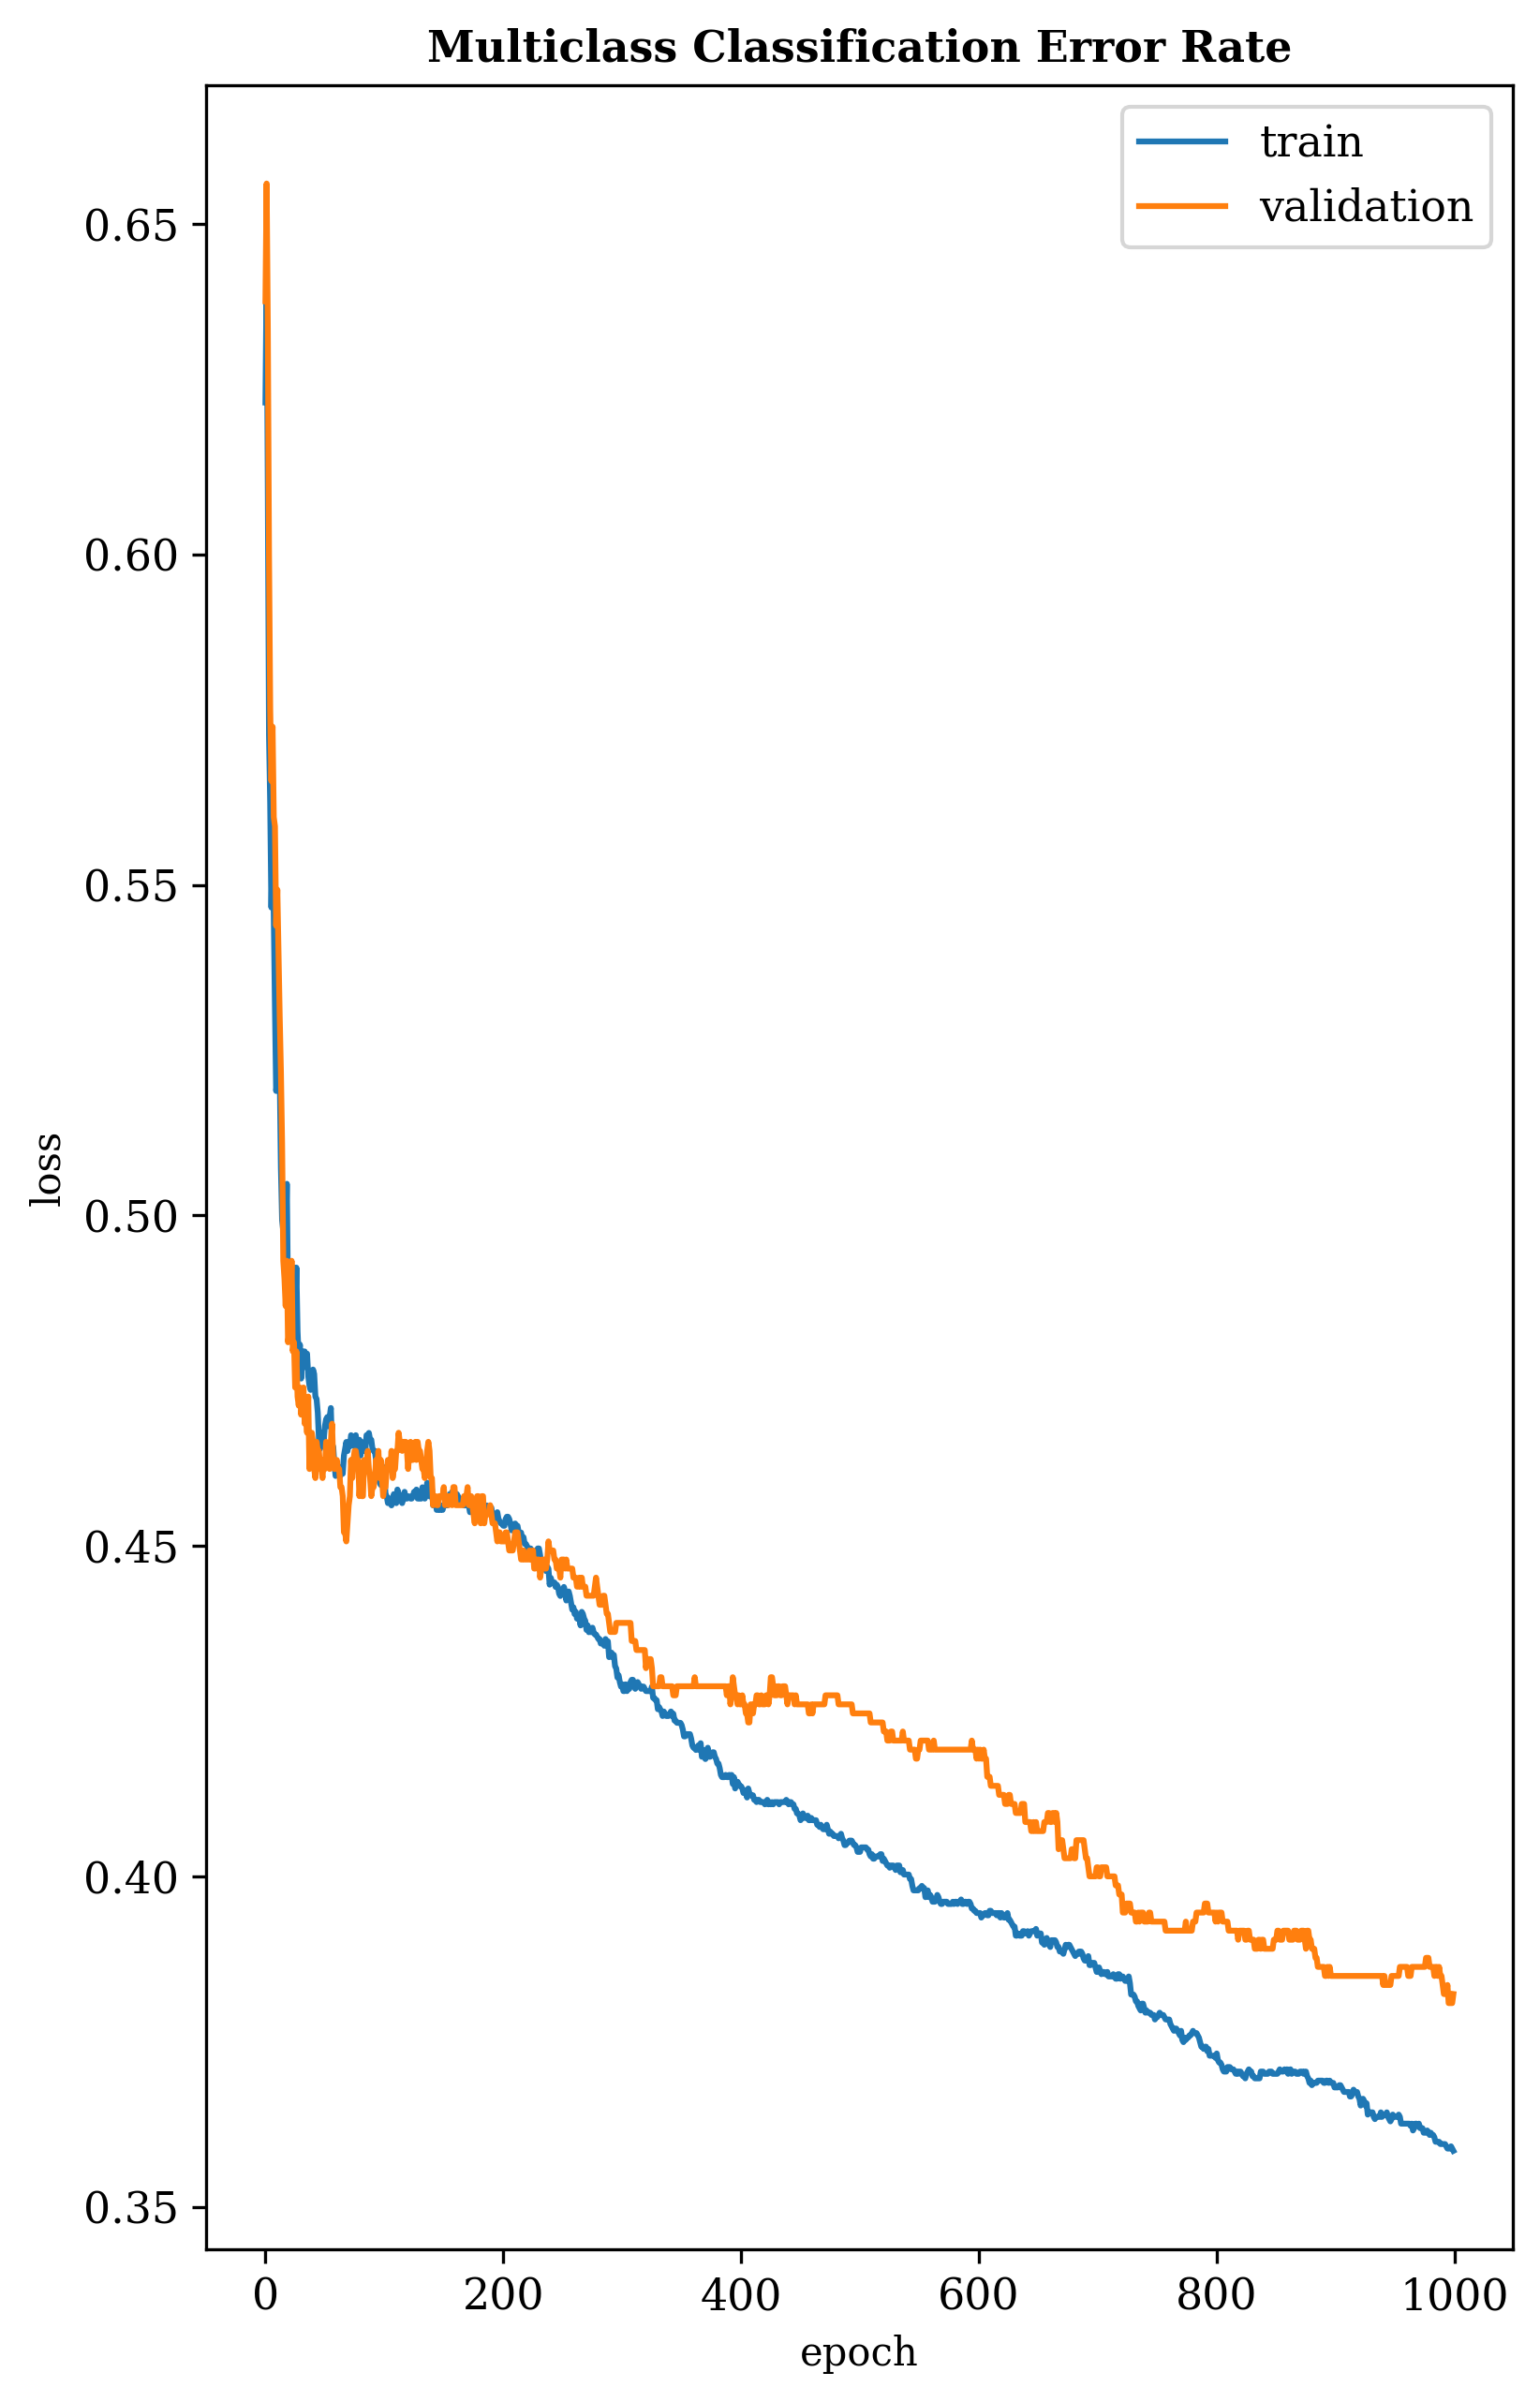

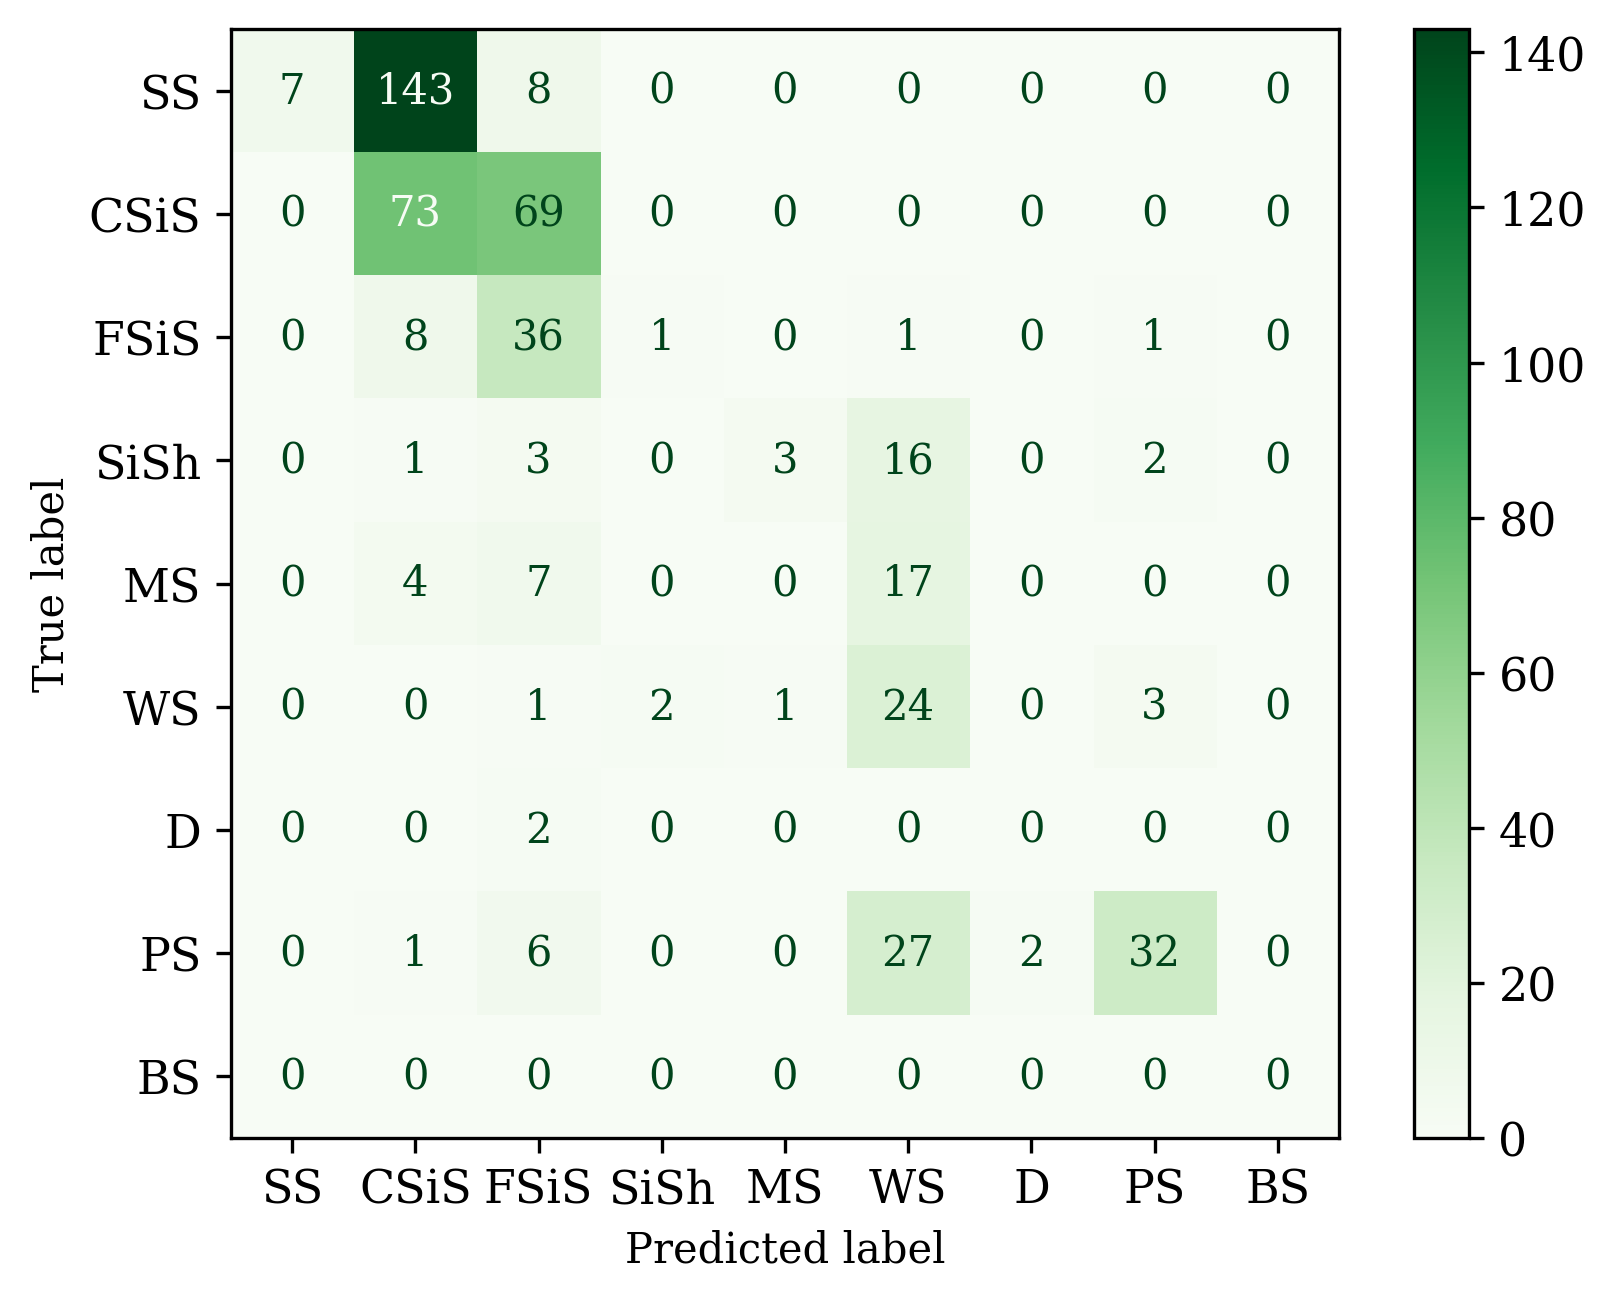

precision:  0.5626823275584442 
recall:  0.34331337325349304 
f1 score:  0.28328634993054264 
support:  None


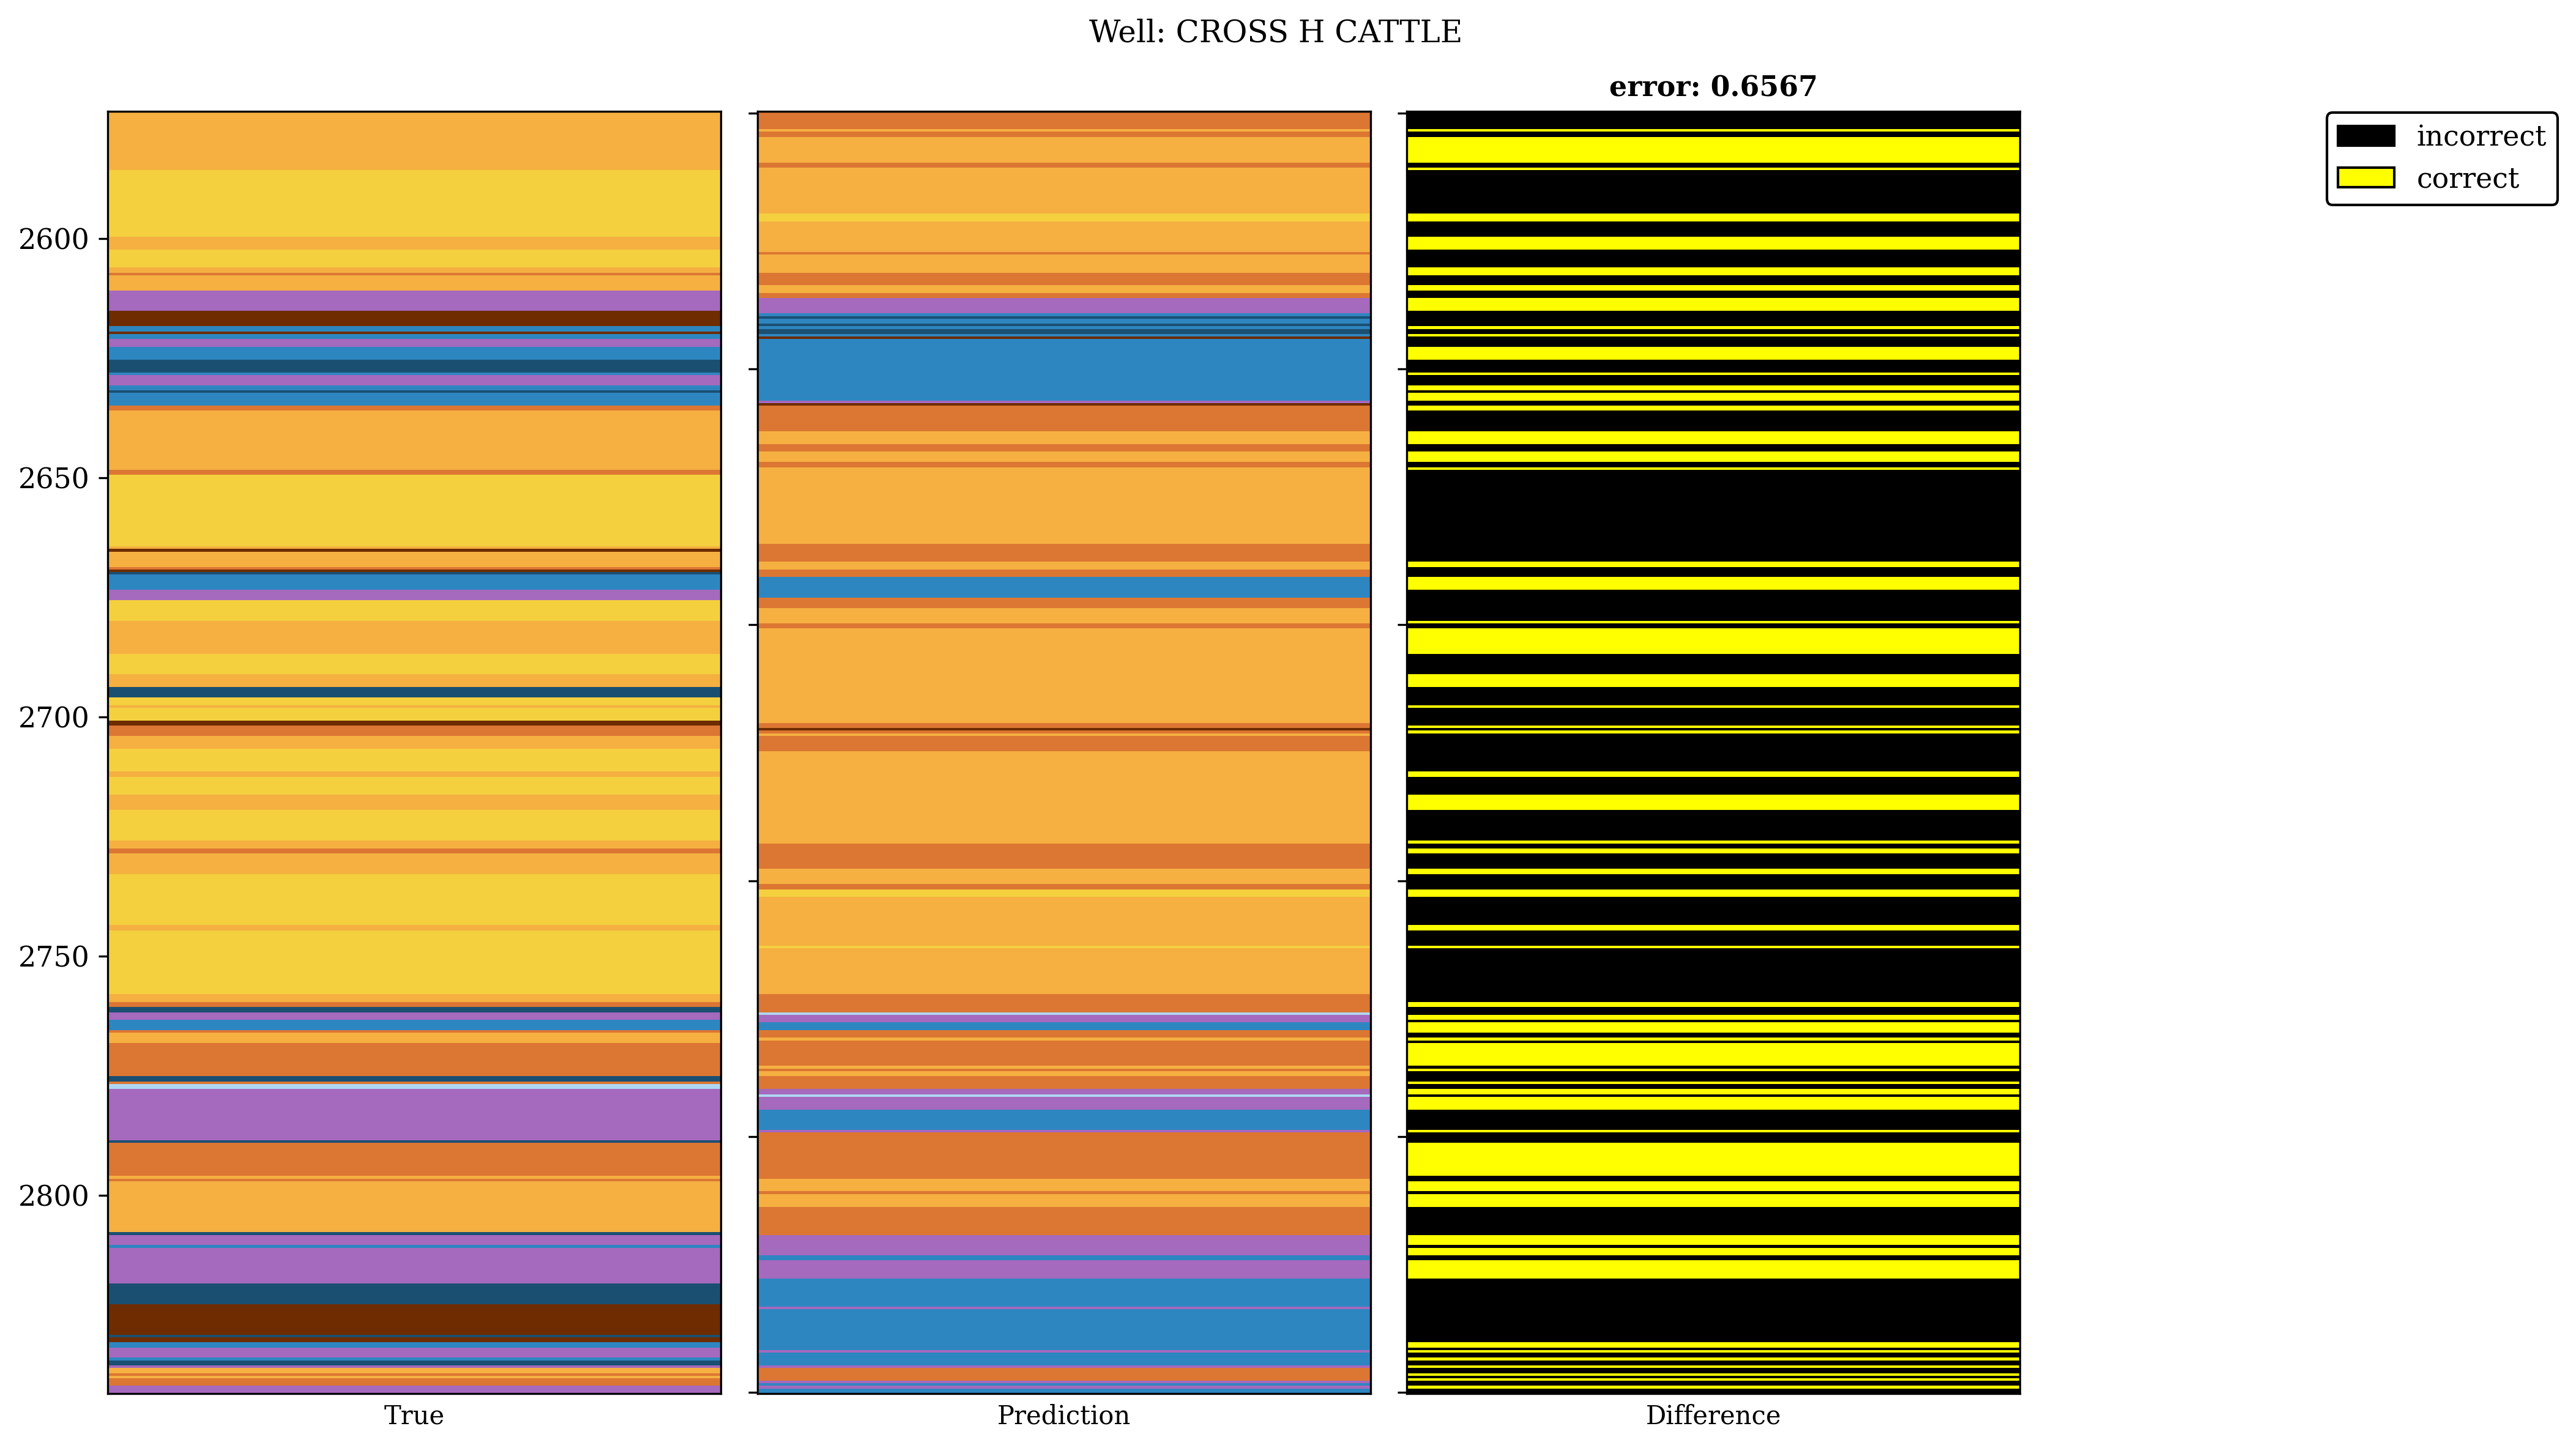

list true facies:  [0 1 2 3 4 5 6 7]
list prediction facies:  [0 1 2 3 4 5 6 7]


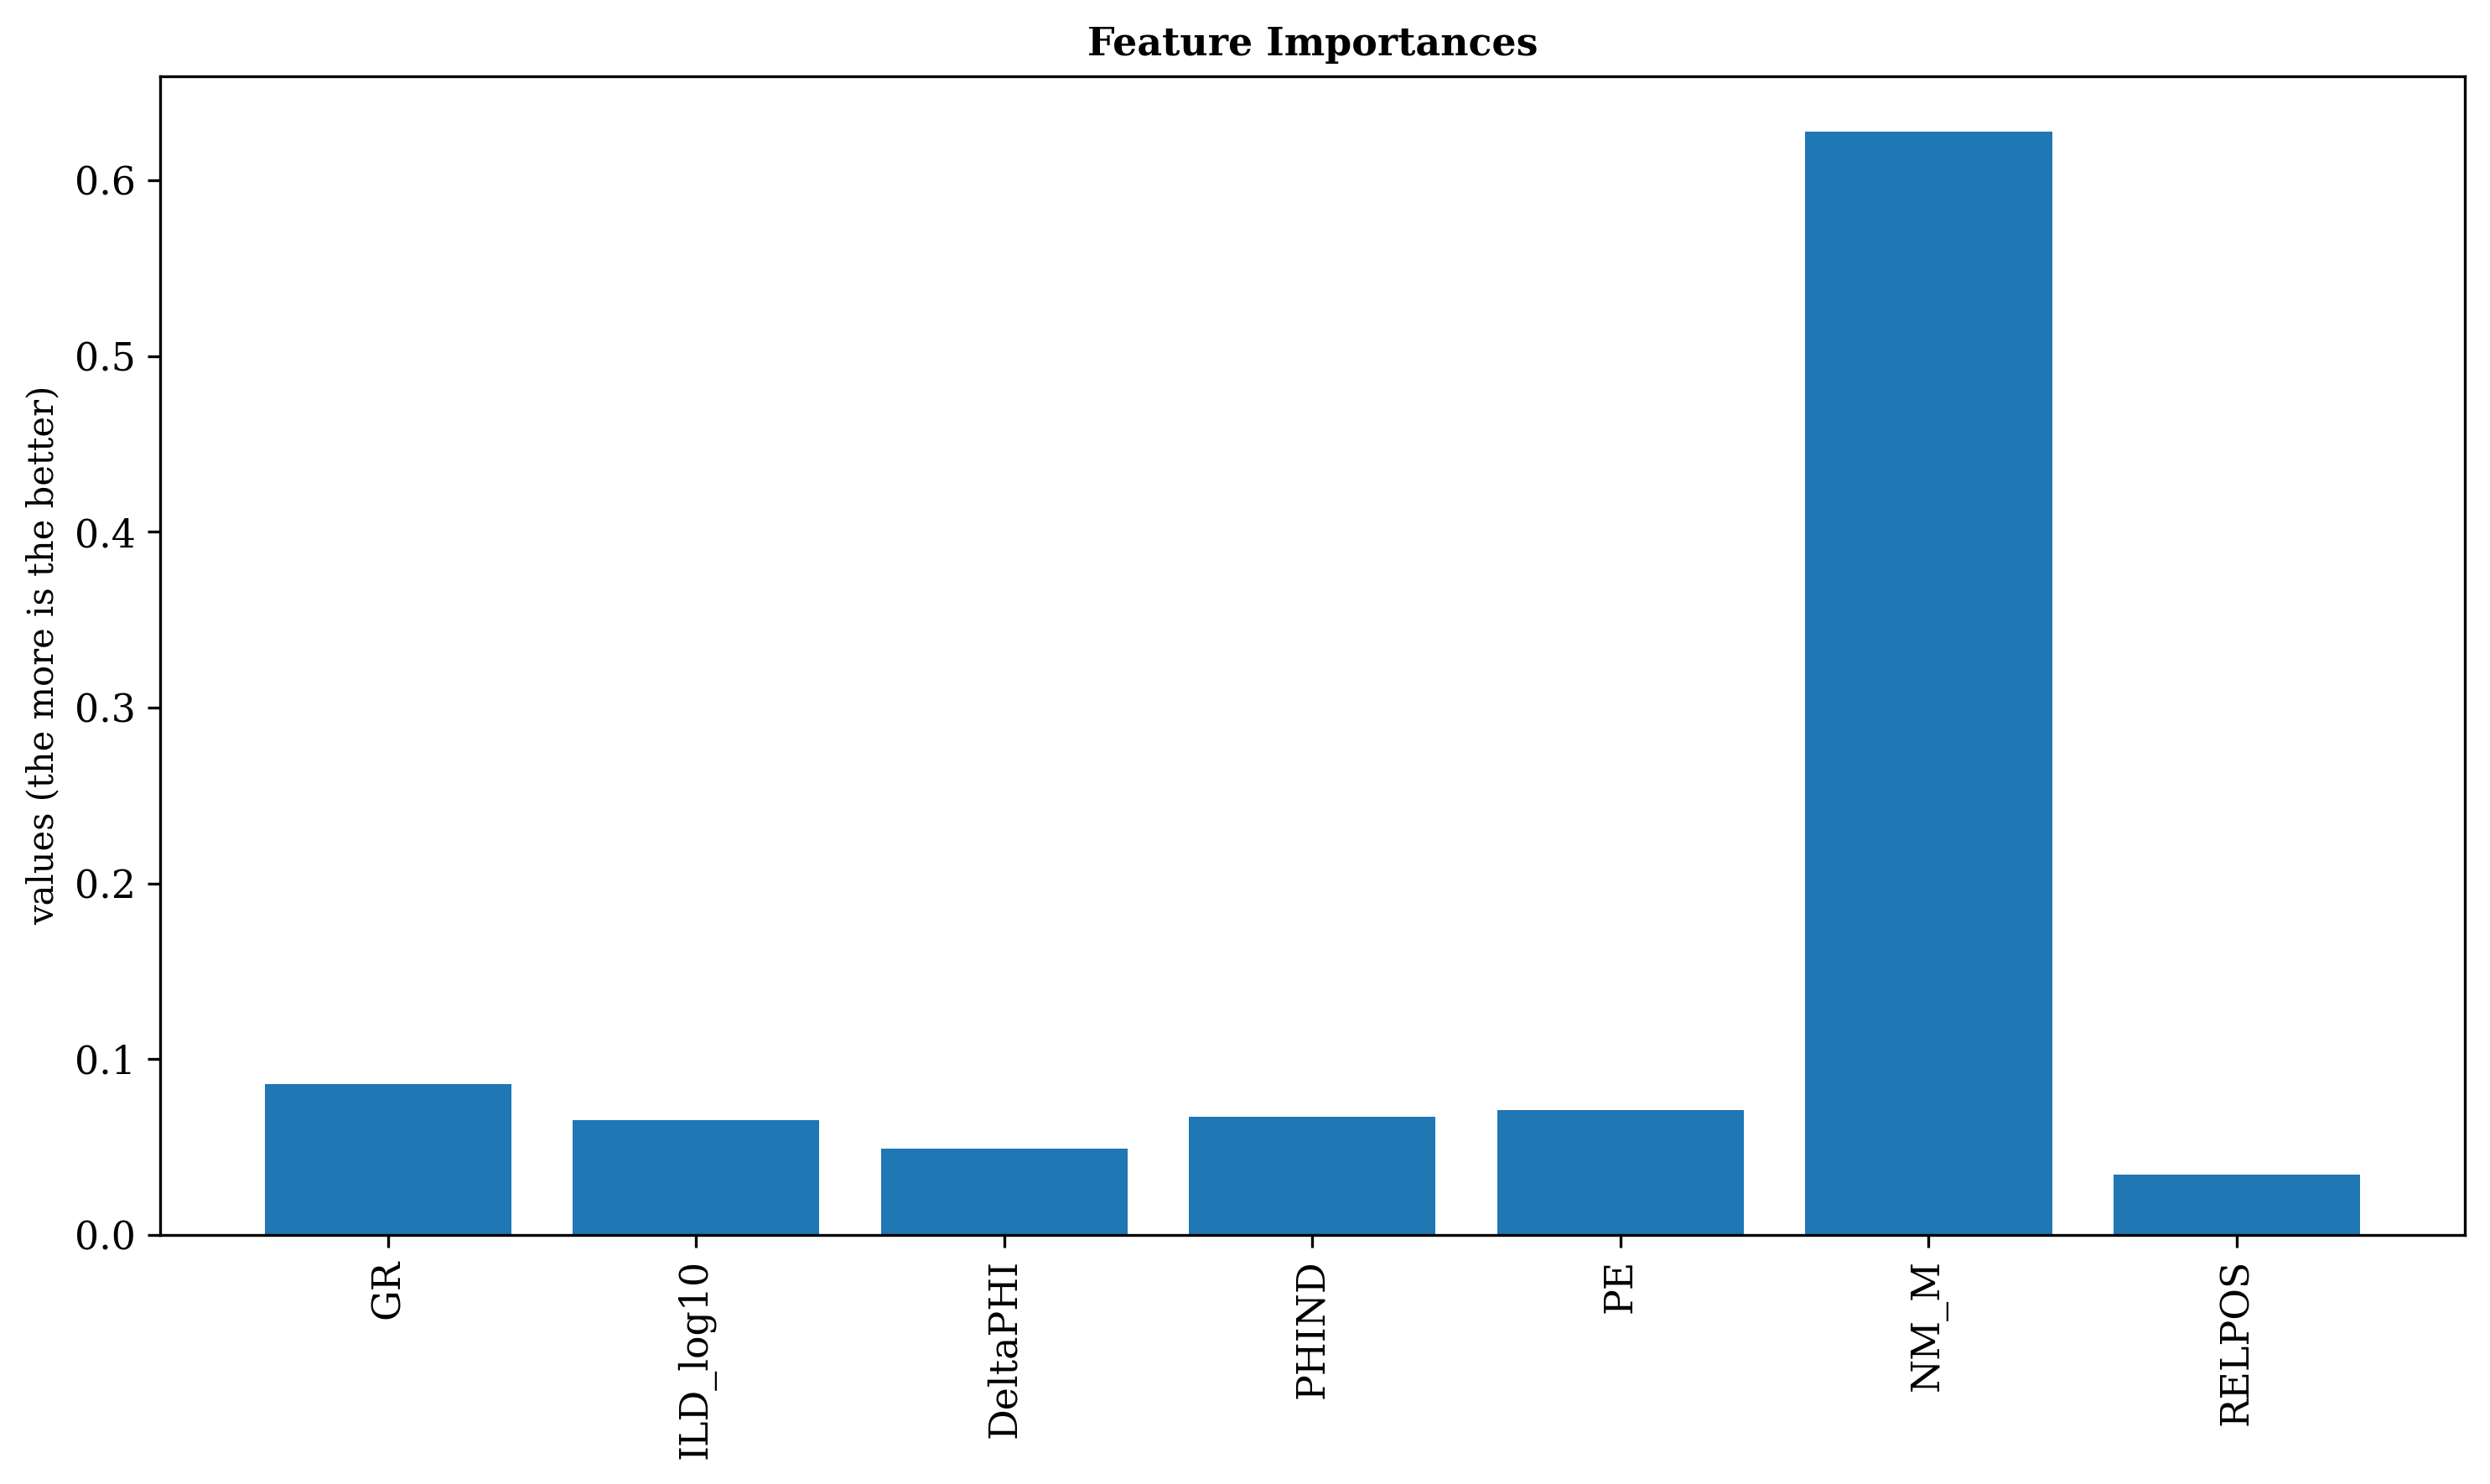

In [1]:
#-----------------------------------------------------------------------------------------#
import sys
sys.path.append('./Libs') 
import utilities as U
#-----------------------------------------------------------------------------------------#
import pandas as pd
import xgboost as xgb
import numpy as np
#-----------------------------------------------------------------------------------------#
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#-----------------------------------------------------------------------------------------#

'''
step 1: Data Loading and Data Wrangling.

1) Load the pandas library to read and manipulate data in Python.
2) Read in a CSV file called 'well_logs.csv' using the pd.read_csv() function and store it in a variable called data.
3) Replace any missing values in the data dataframe with -999 using the fillna() method.
4) Create a LabelEncoder() object called le used to encode the labels as integers, beginning from 0 - 8.
5) Use the fit_transform() method of the LabelEncoder() object le to transform the Facies column of the data dataframe, and store the result in the same column of the dataframe.
6) Optionally, print out the descriptive statistics of the data dataframe using the describe() method.
7) Optionally, print out the unique values of the Facies column and the Well Name column of the data dataframe using the unique() method.
'''

data = pd.read_csv('datasets/well_logs.csv')
data.fillna(-999, inplace=True)
le = LabelEncoder()
data['Facies'] = le.fit_transform(data['Facies'])
# print(data.describe())
# print(data['Facies'].unique())
# print(data['Well Name'].unique())

'''
step 2: Creating Train, Validation, and Test Sets.

1) Select one well for testing.
2) Create two new dataframes: train and test.
3) The train dataframe is created by selecting all rows from the data dataframe where the Well Name column is not equal to test_well.
4) The test dataframe is created by selecting all rows from the data dataframe where the Well Name column is equal to test_well.
5) Define a list of column names called drop_cols which contains the names of the columns to be dropped from the X and X_test dataframes. These columns are Facies, Formation, Well Name, and Depth.
6) Create a new dataframe X by dropping the columns in drop_cols from the train dataframe using the drop() method with the axis=1 argument.
7) Create a new series y, which stores the values of the Facies column of the train dataframe.
8) Create a new dataframe X_test by dropping the columns in drop_cols from the test dataframe using the drop() method with an axis=1 argument.
9) Create a new series y_test which stores the values of the Facies column of the test dataframe.
10) Split the X and y dataframes into training and validation sets using the train_test_split() function from scikit-learn with a test size of 0.2, a random state set to True, and using y as the parameter for stratification.
11) The resulting data is stored in four separate dataframes: X_train, X_val, y_train, and y_val, representing the training and validation sets for the feature matrix and target labels, respectively.
'''

test_well = 'CROSS H CATTLE'
train = data.loc[data['Well Name'] != test_well]
test = data.loc[data['Well Name'] == test_well]
drop_cols = ['Facies', 'Formation', 'Well Name', 'Depth'] 
X = train.drop(drop_cols, axis=1) 
y = train['Facies'] 
X_test = test.drop(drop_cols, axis=1) 
y_test = test['Facies'] 
X_train, X_val, y_train, y_val = train_test_split(X, y, 
												  test_size=0.2,
												  random_state=True,
												  shuffle=y,
												  stratify=y)

'''
step 3: Training and Evaluating Model.

This code segment trains an XGBoost classifier on the training set using the hyperparameters specified in the clf_xgb object. It then evaluates the trained classifier on the validation set, using the specified evaluation metric, and stops training early if the validation score does not improve for 500 rounds. Once the training is complete, it uses the trained classifier to predict the facies labels for the test set and calculates the accuracy of these predictions. Finally, it prints out the accuracy score as a percentage.

The clf_xgb object is an instance of the XGBClassifier class from the xgboost library. The hyperparameters specified in the object are used to control the behavior of the XGBoost algorithm during training. Some essential hyperparameters include max_depth, n_estimators, and learning_rate, which control the depth of the decision trees used by the algorithm, the number of trees in the ensemble, and the step size for each update, respectively.
The eval_metric parameter is used to specify the evaluation metric used to monitor the performance of the classifier during training. In this case, the metric is set to 'merror', which stands for "multiclass classification error rate." The early_stopping_rounds parameter is used to control early stopping, which is a technique for avoiding overfitting by stopping training early if the validation score does not improve for a certain number of rounds.

Once the classifier is trained, the predict method is used to generate predictions for the test set. These predictions are then compared to the true facies labels in the y_test variable using the accuracy_score function from the sklearn.metrics module to compute the accuracy of the classifier's predictions. Finally, the accuracy score is printed out as a percentage using the print statement at the end of the code segment.
'''

evaluation_matrix = 'merror'
clf_xgb = xgb.XGBClassifier(booster='gbtree',
							reg_lambda=0.5,
							alpha=1,
							colsample_bytree=0.1,
							subsample=1,
							eta=1,
							max_depth=10,
							max_leaves=10,
							min_child_weight=50,
							learning_rate=0.01,
							n_estimators=1000,
							objective='multi:softprob',
							tree_method='gpu_hist',
							n_jobs=-1,
							gpu_id=-1,
							verbosity=1)
clf_xgb.set_params(eval_metric=evaluation_matrix, early_stopping_rounds=500) 
clf_xgb.fit(X_train,
			y_train,
			verbose=True,
			eval_set=[(X_train, y_train), (X_val, y_val)])

y_pred = clf_xgb.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
# print(np.unique(predictions))
print("Accuracy: %.4f%%" % (accuracy * 100.0))

'''
step 4: Result Display. 

1) Loss curve history.
2) Confusion matrix.
3) Check true and predict facies.
4) Show feature importances.
'''

results = clf_xgb.evals_result()
U.plot_loss_curves(results, evaluation_matrix)
U.plot_confusion_matrix(y_pred, data, test_well, y_test)
_, list_true_facies, list_pre_facies = U.custom_metric(test, 'Facies', predictions)
print('list true facies: ', list_true_facies)
print('list prediction facies: ', list_pre_facies)
U.plot_feature_importances(clf_xgb, data)